## Developing an Artificial Neural Network from Scratch.

In this notebook, we will be developing a fully-connected feedforward neural network.

We will import the MNIST dataset from keras datsets. The MNIST dataset contains images of 28x28 pixels each having values ranging from 0-255.
It has 60000 images in the training set and 10000 images in the test set. However, we will only use the first 10000 images for training and first 1000 images for testing because our code isn't optimized and it takes time to run. We are not looking for accuracy of our network right now, we will be doing that in the next week when we will be implementing the same using Tensorflow.

In [1]:
import numpy as np
from keras.datasets import mnist
import random

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As discussed in the class, the images are flattened to a column.

Then we are normalizing them by dividing by 255.

In [3]:
train_X=train_X.reshape(60000,784,1)    # flattening
test_X=test_X.reshape(10000,784,1)

train_y=train_y.reshape(60000,1)
test_y=test_y.reshape(10000,1)

train_X= train_X/255
test_X = test_X/255

train_X=train_X[:10000]         #taking the first 10000 images.
train_y=train_y[:10000]
test_X=test_X[:1000]
test_y=test_y[:1000]
train_data=list(zip(train_X,train_y))
test_data=list(zip(test_X,test_y))

## 2.1. Write the code for Sigmoid Function.

In [4]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

# 2.2 The Network

We will making a class called Network which has certain functions inside it. You need to code only the first 3. Rest are done for you.  There are various places within the code marked as stop_zone. Read the instructions below the code at those places to check whether your code till there is correct or not.

In [5]:
class Network(object):
    def __init__(self,sizes):
        self.num_layers=len(sizes)
        self.sizes=sizes
        self.biases=[np.random.randn(y,1) for y in sizes[1:]]
        self.weights= [np.random.randn(y,x) for y,x in zip(sizes[1:],sizes[:-1])]

# stop_zone 1. Comment out all the code below. Select all rows below. Click Ctrl + /.
# Include the show function given below above this comment area inside the class.
# Run this cell and then run the code with stop_zone 1 written below.
# After this testing, don't forget to remove the comments. Same, select all, Ctrl+/.

    def forwardpropagation(self,a):
        for b,w in zip(self.biases, self.weights):
            a=sigmoid(np.dot(w,a)+b)
            # print(a.shape)
        return a

# stop_zone 2. Comment out all the code below. Don't comment out the __init__ method else you will get error.
# Remove comment from print(a.shape) line above. Run this cell. And run the code with stop_zone 2 written below.


    def backpropagation(self,x,y):

        # nothing to do in this 3 lines. it is for creating a one-hot encoded vector of the labels.
        y_t = np.zeros((len(y), 10))
        y_t[np.arange(len(y)), y] = 1
        y_t= y_t.T

        #nabla_b=dC/db and nabla_w=dC/dw. They are lists of shapes equal to that of bias and weights.
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]

        # initially, a0 = input.
        activation=x
        activation_list=[x]

        # step 1 : calculation of delta in last layer

        # write the same forward propagation code here but while doing so store the a's in the activation_list.
        for w,b in zip(self.weights,self.biases):
            activation= sigmoid(np.dot(w,activation)+b)
            activation_list.append(activation)

        delta= (activation_list[-1]-y_t)

        # step 2 : nabla_b and nabla_w relation with delta of last layer

        nabla_b[-1]=delta
        nabla_w[-1]= np.dot(delta,activation_list[-2].T)

        # print("{} {}".format(nabla_b[-1].shape,nabla_w[-1].shape) )
# stop_zone 3 : remove comment from the print statement just above and run the cell for stop_zone3.
# don't forget commenting out.
        # step 3 : calculation of delta for hidden layers

        for j in range(2,self.num_layers):
            sig_der = activation_list[-j]*(1-activation_list[-j])
            delta= np.dot(self.weights[-j+1].T,delta)*sig_der

            # step 4 : nabla_b and nabla_w relation with delta of others layers
            nabla_b[-j]=delta
            nabla_w[-j]=np.dot(delta,activation_list[-j-1].T)

        return (nabla_b,nabla_w)

# stop_zone 4 : Run the cell for stop_zone 4.

    def SGD(self, train_data,epochs,mini_batch_size, lr):
        n_train= len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k+ mini_batch_size] for k in range(0,n_train,mini_batch_size)]

  # Stop zone 5 : Remove comment from the next print line and comment out all the lines below it.
        # print(np.array(mini_batches, dtype=object).shape)

            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,lr)

            self.predict(train_data)
            print("Epoch {0} completed.".format(i+1))

    # the functions below are complete. If you are fine till stop_zone 5, you can run
    # this whole cell and train, test the data by running the last cell of the notebook.
    # You may need to wait for around 10 minutes to see the test predictions.

    def update_mini_batch(self,mini_batch,lr):
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]
        for x,y in mini_batch:
            delta_b,delta_w= self.backpropagation(x,y)
            nabla_b=[nb+ db for nb,db in zip (nabla_b,delta_b)]
            nabla_w=[nw+dw for nw,dw in zip(nabla_w,delta_w)]

        self.weights=[w- lr*nw/len(mini_batch) for w,nw in zip(self.weights,nabla_w)]
        self.biases=[b-lr*nb/len(mini_batch) for b,nb in zip(self.biases,nabla_b)]

    def predict(self,test_data):
        test_results = [(np.argmax(self.forwardpropagation(x)),y) for x,y in test_data]
        # returns the index of that output neuron which has highest activation

        num= sum(int (x==y) for x,y in test_results)
        print ("{0}/{1} classified correctly.".format(num,len(test_data)))



In [9]:
# stop_zone 1

def show(self):
  for bias in self.biases:
      print(bias.shape)
  for weight in self.weights:
      print(weight.shape)

# Copy this show function from here. Paste it inside that Network Class.
# Comment out the show function here. Run this cell.

net=Network([784,128,64,10])
# net.show()

# The desired output is :
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

In [11]:
# stop_zone 2
# to use this, make sure your data is loaded. Run this cell.
net=Network([784,128,64,10])
fp = net.forwardpropagation(train_X[0])

# The desired output is :
# (128, 1)
# (64, 1)
# (10, 1)
#  If you are getting this, you are correct. Proceed to backpropagation.

In [12]:
# stop_zone 3
net=Network([784,128,64,10])
net.backpropagation(train_X[0],train_y[0])

# Desired output : (10,1) (10,64)

([array([[-9.60500139e-06],
         [ 3.34395947e-02],
         [ 9.85794569e-08],
         [ 3.44016089e-01],
         [ 1.49127107e-02],
         [ 2.87298223e-06],
         [-2.55144082e-02],
         [-6.58399409e-07],
         [ 1.76334775e-03],
         [ 6.17087257e-05],
         [ 1.84108893e-02],
         [ 1.50937697e-02],
         [-6.02309726e-02],
         [ 1.37298512e-01],
         [-7.18710635e-04],
         [ 5.55248820e-04],
         [ 8.40140825e-02],
         [-1.06439047e-02],
         [-3.19243053e-08],
         [-2.11652942e-04],
         [ 1.00485851e-04],
         [-2.68313320e-07],
         [-8.18446376e-02],
         [ 4.54829827e-06],
         [ 7.54569182e-10],
         [ 1.59023275e-07],
         [-4.43227087e-05],
         [ 5.85005678e-03],
         [ 9.24979662e-03],
         [-3.60822768e-06],
         [-1.26103062e-02],
         [ 2.09813733e-01],
         [ 2.30683418e-03],
         [-1.77444572e-02],
         [ 1.95401469e-01],
         [-1.5447817

In [13]:
# Stop zone 4
net=Network([784,128,64,10])
nabla_b,nabla_w=net.backpropagation(train_X[0],train_y[0])
for nb in nabla_b:
  print(nb.shape)
for nw in nabla_w:
  print(nw.shape)

# Desired output:
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)

(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [14]:
# Stop zone 5 :  Run this cell, for 10000 samples and batch size of 20, output should be
#       (500,20,2).  500 batches each of size 20 and has 2 objects : train and test data.

net=Network([784,256,128,64,10])
net.SGD(train_data=train_data,epochs=20,mini_batch_size=20,lr=0.01)

2236/10000 classified correctly.
Epoch 1 completed.
3028/10000 classified correctly.
Epoch 2 completed.
3752/10000 classified correctly.
Epoch 3 completed.
4196/10000 classified correctly.
Epoch 4 completed.
4723/10000 classified correctly.
Epoch 5 completed.
5034/10000 classified correctly.
Epoch 6 completed.
5355/10000 classified correctly.
Epoch 7 completed.
5670/10000 classified correctly.
Epoch 8 completed.
5867/10000 classified correctly.
Epoch 9 completed.
6139/10000 classified correctly.
Epoch 10 completed.
6359/10000 classified correctly.
Epoch 11 completed.
6518/10000 classified correctly.
Epoch 12 completed.
6638/10000 classified correctly.
Epoch 13 completed.
6754/10000 classified correctly.
Epoch 14 completed.
6906/10000 classified correctly.
Epoch 15 completed.
7037/10000 classified correctly.
Epoch 16 completed.
7142/10000 classified correctly.
Epoch 17 completed.
7254/10000 classified correctly.
Epoch 18 completed.
7339/10000 classified correctly.
Epoch 19 completed.
74

In [15]:
net=Network([784,256,128,64,10])
net.SGD(train_data=train_data,epochs=20,mini_batch_size=20,lr=0.01)
print("Test data:")
net.predict(test_data)

2742/10000 classified correctly.
Epoch 1 completed.
4022/10000 classified correctly.
Epoch 2 completed.
4871/10000 classified correctly.
Epoch 3 completed.
5443/10000 classified correctly.
Epoch 4 completed.
5868/10000 classified correctly.
Epoch 5 completed.
6251/10000 classified correctly.
Epoch 6 completed.
6544/10000 classified correctly.
Epoch 7 completed.
6788/10000 classified correctly.
Epoch 8 completed.
6983/10000 classified correctly.
Epoch 9 completed.
7163/10000 classified correctly.
Epoch 10 completed.
7293/10000 classified correctly.
Epoch 11 completed.
7418/10000 classified correctly.
Epoch 12 completed.
7535/10000 classified correctly.
Epoch 13 completed.
7644/10000 classified correctly.
Epoch 14 completed.
7720/10000 classified correctly.
Epoch 15 completed.
7816/10000 classified correctly.
Epoch 16 completed.
7880/10000 classified correctly.
Epoch 17 completed.
7941/10000 classified correctly.
Epoch 18 completed.
7989/10000 classified correctly.
Epoch 19 completed.
80

# Question 3

1. Load the MNIST dataset as in the previous question.
2. Visualize the first 20 images of both train and test data using plt.imshow()
3. Choose any of tensorflow and pytorch.
4. The architecture :
> input layer (optional) <br/>
> flatten layer <br/>
> some hidden dense layers (tensorflow) <br/> **OR** <br/>
> some linear layers with non linear activation (pytorch) <br/>
> output dense/linear layer of 10 neurons.

5. For Tensorflow or PyTorch, you may either use Sequential API or Functional API to define the model.<br/>
However, for PyTorch, you need to load the data using a DataLoader function and then iterate over the data to train.

6. Normalize the images before training.
7. While training, use Adam Optimizer and Sparse Categorical Cross Entropy Loss function (Tensorflow) / Cross Entropy Loss (Pytorch).

In [16]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

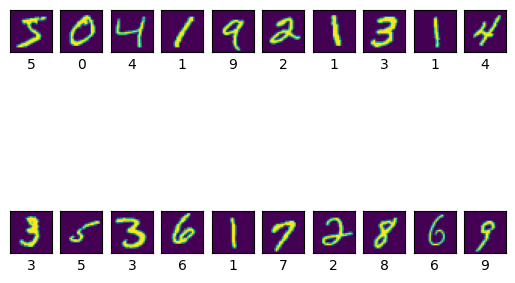

In [17]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(20):
  plt.subplot(2,10,1+i)
  plt.imshow(train_X[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(train_y[i])
plt.show()

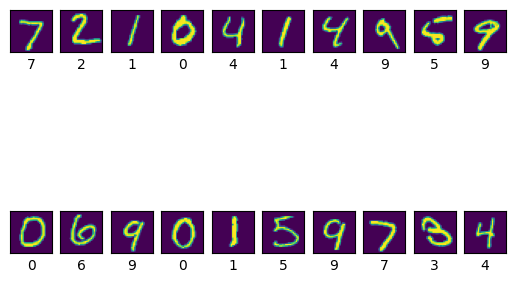

In [18]:
plt.figure()
for i in range(20):
  plt.subplot(2,10,1+i)
  plt.imshow(test_X[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(test_y[i])
plt.show()

In [19]:
train_X, test_X = train_X / 255.0, test_X / 255.0

# Tensorflow Sequential API

In [20]:
from tensorflow.keras import models,layers
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [21]:
import tensorflow as tf
model1.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model1.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2413 - sparse_categorical_accuracy: 0.9289
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1030 - sparse_categorical_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0712 - sparse_categorical_accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0548 - sparse_categorical_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0341 - sparse_categorical_accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0249 - sparse_categorical_accuracy: 0.9916
Epoch 9/10
1875/1875 [=========

In [22]:
model1.evaluate(x=test_X,y=test_y,batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0882 - sparse_categorical_accuracy: 0.9802


[0.08817114681005478, 0.9801999926567078]

In [23]:
import numpy as np
y_pred1= model1.predict(test_X)
pred1=[]
for i in range(len(y_pred1)):
  pred1.append(np.argmax(y_pred1[i]))

for i in range(20):
  print("{} {}".format(pred1[i],test_y[i]))

313/313 [==============================] - 1s 1ms/step
7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4


# PyTorch

In [24]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [25]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_X, data_y):
        self.data_X = data_X
        self.data_y = data_y

    def __getitem__(self, i):
        x = self.data_X[i]
        y = self.data_y[i]
        return x,y

    def __len__(self):
        return len(self.data_X)

In [26]:
train_dataset = Dataset(train_X,train_y)
test_dataset = Dataset(test_X,test_y)

train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [27]:
class FCN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(784,512, dtype=torch.float64)
        self.act1 = nn.ReLU()
        self.linear2 = nn.Linear(512,256, dtype=torch.float64)
        self.act2 = nn.ReLU()
        self.linear3 = nn.Linear(256,64, dtype=torch.float64)
        self.act3 = nn.ReLU()
        self.linear4 = nn.Linear(64,10, dtype=torch.float64)
        self.act4 = nn.Softmax(dim=1)
        # self.linear5 = nn.Linear(10,1, dtype=torch.float64)

    def forward(self, x):
        # print(x.shape, x.dtype)
        x= self.flatten(x)
        x= self.linear1(x)
        x= self.act1(x)
        x= self.linear2(x)
        x= self.act2(x)
        x= self.linear3(x)
        x= self.act3(x)
        x= self.linear4(x)
        x= self.act4(x)
        # x= self.linear5(x)
        # print(x.shape, x.dtype)
        return x

In [28]:
fcn = FCN()

EPOCHS = 10

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([
    dict(params=fcn.parameters(), lr=0.0001),
])

In [29]:
%%time
fcn.to(DEVICE)
fcn.train()
for i in range(0, EPOCHS):
    total_loss = 0.0
    print("Epoch {} ".format(i+1))

    for i, (x,y) in enumerate(train_loader):
        x = x.to(DEVICE)
        y = y.to(DEVICE)

        optimizer.zero_grad()
        outputs = fcn(x) # forward pass

        loss = criterion(outputs, y)
        total_loss += loss.item() * x.size(0)

        loss.backward()  # backprogagation
        optimizer.step()

    print(total_loss)

Epoch 1 
102919.55280379143
Epoch 2 
93580.33060175521
Epoch 3 
92173.28670394642
Epoch 4 
91441.14533296242
Epoch 5 
90926.21038100997
Epoch 6 
90527.11706039941
Epoch 7 
90210.58255425289
Epoch 8 
89954.32531677968
Epoch 9 
89741.89858653567
Epoch 10 
89567.08967347651
CPU times: user 53.9 s, sys: 1.2 s, total: 55.1 s
Wall time: 59.1 s


In [30]:
losses=0
fcn.eval()
for i, (x,y) in enumerate(test_loader):
    x = x.to(DEVICE)
    y = y.to(DEVICE)
    yhat = fcn(x)
    loss = criterion(yhat,y)
    losses+= loss.item() * x.size(0)
print(losses)

15009.968851575068


In [31]:
test_viewer = DataLoader(test_dataset, batch_size=20)

fcn.eval()
for i, (x,y) in enumerate(test_viewer):
    x = x.to(DEVICE)
    y = y.to(DEVICE)
    yhat = fcn(x)
    loss = criterion(yhat,y)

    print(loss)
    # print(len(yhat))
    for length in range(len(yhat)):
      print(torch.argmax(yhat[length]), y[length])
    break

tensor(1.4619, device='cuda:0', dtype=torch.float64,
       grad_fn=<NllLossBackward0>)
tensor(7, device='cuda:0') tensor(7, device='cuda:0', dtype=torch.uint8)
tensor(2, device='cuda:0') tensor(2, device='cuda:0', dtype=torch.uint8)
tensor(1, device='cuda:0') tensor(1, device='cuda:0', dtype=torch.uint8)
tensor(0, device='cuda:0') tensor(0, device='cuda:0', dtype=torch.uint8)
tensor(4, device='cuda:0') tensor(4, device='cuda:0', dtype=torch.uint8)
tensor(1, device='cuda:0') tensor(1, device='cuda:0', dtype=torch.uint8)
tensor(4, device='cuda:0') tensor(4, device='cuda:0', dtype=torch.uint8)
tensor(9, device='cuda:0') tensor(9, device='cuda:0', dtype=torch.uint8)
tensor(5, device='cuda:0') tensor(5, device='cuda:0', dtype=torch.uint8)
tensor(9, device='cuda:0') tensor(9, device='cuda:0', dtype=torch.uint8)
tensor(0, device='cuda:0') tensor(0, device='cuda:0', dtype=torch.uint8)
tensor(6, device='cuda:0') tensor(6, device='cuda:0', dtype=torch.uint8)
tensor(9, device='cuda:0') tensor(9,